In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.datasets import load_digits
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Esempio con clustering

In [37]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [38]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


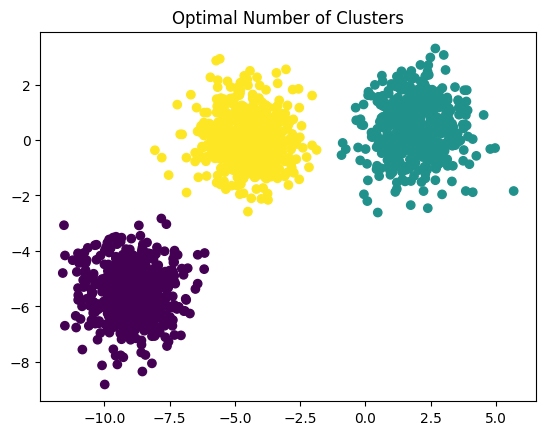

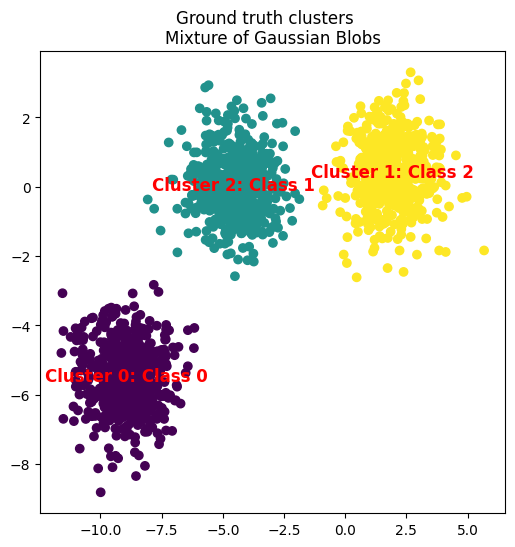

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generiamo dei dati di esempio

# random_state=43 stato da inserire per avere 1/3 dei risultati giusti

# Eseguiamo il clustering
n_clusters = 3  # numero di cluster
y_pred = KMeans(n_clusters=n_clusters,random_state=43).fit_predict(X)
#y=df['Label']
# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = X[y_pred == i]
    cluster_classes = y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

# Plot dei risultati
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(X[:, 0], X[:, 1], c=y)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):

    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)

    axs.text(
        np.mean(X[y_pred == i, 0]), np.mean(X[y_pred == i, 1]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

In [40]:
print(accuracy_score(y_pred,y))

0.3333333333333333


In [41]:
for index, row in difference.iterrows():
    print(row['num_cluster'], row['num_class'])

1 2
2 1


In [42]:
indexes_0 = [
    index for index in range(len(y_pred))
    if y_pred[index] == 0
]

indexes_1 = [
    index for index in range(len(y_pred))
    if y_pred[index] == 1
]

indexes_2 = [
    index for index in range(len(y_pred))
    if y_pred[index] == 2
]

In [43]:
'''for a in indexes_0:
    y_pred[a] = 2'''

for a in indexes_1:
    y_pred[a] = 2

for a in indexes_2:
    y_pred[a] = 1

In [44]:
print(accuracy_score(y_pred,y))

1.0
